# EurNLP 2019 paper

## Results


In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn
seaborn.set_context(context="talk")
#%matplotlib inline

paper_out_dir = "/Users/mihaylov/research/qa-knowreader-long-docs/paper"

In [2]:
def draw_headmap(data, x, y, ax, x2=None, y1=None):
    seaborn.heatmap(data, 
                    xticklabels=x,
                    yticklabels=y, 
                    vmin=0.0, vmax=1.0, 
                    square=True, 
                    cbar=False, ax=ax)


### Improvement per question type

In [56]:
result_tsv_text = """-	Oracle	BiDAF	QANet	Coref	DiscRel (All)	DiscRel (Exp)	DiscRel (NonE)	DiscRel (Exp NoSense) 	DiscRel (NonE NoSense)	Sent span 3	SRL 3 verbs	SRL	SRL + DiscRel (Exp)	SRL + DiscRel (NonE)	SRL + DiscRel (All)	SRL + DiscRel (Exp) + Coref	SRL + DiscRel (All) + Coref
-	oracle_full	bidaf	qanet	coref_feats	sdp_exp_nonexp	sdp_exp	sdp_ne	sdp_exp_nosense	sdp_ne_nosense	sentspan3	srl_3verbs	srl_4verbs	multi_srl_sdp_exp	multi_srl_sdp_nonexp	multi_srl_sdp_exp_nonexp	multi_srl_sdp_exp_coref_feats	multi_srl_sdp_coref_12_heads_all_layers
all	70.82	49.63	48.66	1.21	1.34	3.43	0.98	0.56	1.34	1.61	1.03	1.53	1.84	1.40	1.31	1.13	1.21
how	53.48	35.26	33.00	0.71	1.00	1.32	1.86	1.11	-0.17	0.53	0.75	1.00	0.85	0.44	1.34	0.08	1.96
how far*	65.76	51.55	48.62	8.33	-26.40	10.45	10.45	2.86	10.45	16.70	-22.88	2.93	10.45	10.45	-22.14	13.67	10.45
how long*	69.92	65.22	62.91	3.68	6.25	3.33	-1.34	-2.25	-0.37	-0.61	-0.38	-2.32	2.50	4.04	-1.22	4.52	2.01
how many	54.57	52.11	46.75	12.36	2.45	2.54	5.50	2.50	8.63	6.99	10.06	3.26	5.42	3.00	5.58	10.15	7.05
how much*	67.59	67.42	61.87	4.48	9.44	12.23	1.91	-4.11	0.09	5.75	5.61	3.91	11.52	4.73	7.28	9.43	4.22
how old*	28.62	19.39	23.52	4.22	-0.03	-9.91	1.05	-13.88	3.48	-0.65	7.36	5.22	1.87	1.14	-5.66	3.69	3.92
other*	50.11	16.57	18.59	7.73	-5.60	-1.53	0.88	6.14	3.44	2.17	10.27	7.77	6.74	7.91	2.62	-0.48	3.43
what	69.73	48.57	47.88	0.77	0.40	3.11	0.28	0.71	0.62	0.68	0.09	1.24	1.36	1.61	0.97	0.54	0.55
when	64.11	45.01	39.66	4.25	2.05	5.71	4.04	4.88	5.03	5.81	0.09	4.80	6.98	2.57	3.25	4.21	6.55
where	80.66	61.37	62.75	-0.22	-1.08	1.78	-0.01	0.10	0.61	-0.38	-0.94	0.44	1.15	0.21	0.77	1.19	-0.40
which	85.64	53.21	55.99	-1.59	0.94	3.44	-2.81	-0.24	-1.20	-0.95	0.46	-1.57	3.14	0.91	-1.06	-0.72	1.28
who	82.97	56.90	55.97	1.88	3.49	5.40	1.87	0.17	2.80	3.77	3.07	2.30	2.35	1.90	2.25	1.74	1.88
why	49.59	35.70	33.51	0.69	1.31	1.86	1.35	0.06	0.96	1.02	0.37	1.54	0.96	-0.15	0.17	0.60	0.31
col	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17"""


In [63]:
sep_row = "\n"
sep_col = "\t"

result_list = [x.strip().split(sep_col) for x in result_tsv_text.split(sep_row)]
print(result_list)
axis_hor = result_list[0]
axis_vert = [x[0] for x in result_list]

# to array
exclude_rows = {0,1,4,5,6,7,8,9,10,12,13,16}

include_baseline_bidaf = False
include_qanet_base_and_oracle = True
exclude_cols = [0,11,1,3] + [4,8,9,10,14,16]
baseline_cols = [1,3]
if not include_baseline_bidaf:
    exclude_cols.append(2)
    
print(exclude_cols)

axis_hor = [x for x_id, x in enumerate(axis_hor) if x_id not in exclude_cols]
axis_hor_baselines = [x for x_id, x in enumerate(result_list[0]) if x_id in baseline_cols and x_id not in {0, 11}]
axis_vert = [x for x_id, x in enumerate(axis_vert) if x_id not in exclude_rows]

data_list = [[float(c) for c_id, c in enumerate(r) if c_id not in exclude_cols] for r_id, r in enumerate(result_list) if r_id not in exclude_rows]
data_list_baselines = [[float(c) for c_id, c in enumerate(r) if c_id in baseline_cols and c_id not in {0, 11}] for r_id, r in enumerate(result_list) if r_id not in exclude_rows]

data_annot = np.asarray(data_list)
data_annot_baselines = np.asarray(data_list_baselines)
if include_baseline_bidaf:
    data_annot[:, 0] = data_annot[:, 0] - data_annot_baselines[:, 1]
data_list = data_annot.tolist()

significant_values = np.asarray([[c for c_id, c in enumerate(r) if c_id not in exclude_cols] for r_id, r in enumerate(data_list) if "*" not in axis_vert[r_id] and "how " not in axis_vert[r_id]])
signif_max = min(5.0, significant_values.max())
signif_min = significant_values.min()

data_val = [[v/signif_max if v >= 1.0 else (v/abs(signif_min) if v <= -1.0 else (-0.05 if v >-1.0 and v < 0.0 else 0.05)) for v in x] for x in data_list]
data_val_baseline = np.zeros(data_annot_baselines.shape)

include_qanet_and_oracle = True
if include_qanet_and_oracle:
    data_val = np.concatenate((data_val_baseline, data_val), axis=1)
    data_annot = np.concatenate((data_annot_baselines, data_annot), axis=1)
    axis_hor = axis_hor_baselines + axis_hor

[['-', 'Oracle', 'BiDAF', 'QANet', 'Coref', 'DiscRel (All)', 'DiscRel (Exp)', 'DiscRel (NonE)', 'DiscRel (Exp NoSense) ', 'DiscRel (NonE NoSense)', 'Sent span 3', 'SRL 3 verbs', 'SRL', 'SRL + DiscRel (Exp)', 'SRL + DiscRel (NonE)', 'SRL + DiscRel (All)', 'SRL + DiscRel (Exp) + Coref', 'SRL + DiscRel (All) + Coref'], ['-', 'oracle_full', 'bidaf', 'qanet', 'coref_feats', 'sdp_exp_nonexp', 'sdp_exp', 'sdp_ne', 'sdp_exp_nosense', 'sdp_ne_nosense', 'sentspan3', 'srl_3verbs', 'srl_4verbs', 'multi_srl_sdp_exp', 'multi_srl_sdp_nonexp', 'multi_srl_sdp_exp_nonexp', 'multi_srl_sdp_exp_coref_feats', 'multi_srl_sdp_coref_12_heads_all_layers'], ['all', '70.82', '49.63', '48.66', '1.21', '1.34', '3.43', '0.98', '0.56', '1.34', '1.61', '1.03', '1.53', '1.84', '1.40', '1.31', '1.13', '1.21'], ['how', '53.48', '35.26', '33.00', '0.71', '1.00', '1.32', '1.86', '1.11', '-0.17', '0.53', '0.75', '1.00', '0.85', '0.44', '1.34', '0.08', '1.96'], ['how far*', '65.76', '51.55', '48.62', '8.33', '-26.40', '10.45

In [64]:
#print(data_val)


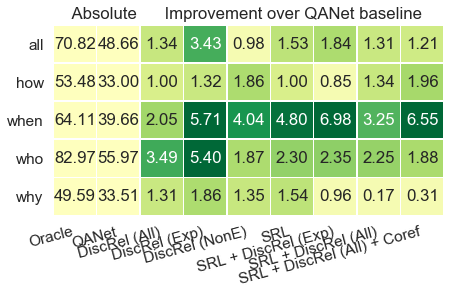

In [65]:
# Improvemenets
fig, axs = plt.subplots(1, 1, figsize=(7, 3.5))
seaborn.heatmap(data_val, 
                annot=data_annot,
                xticklabels=axis_hor,
                yticklabels=axis_vert, 
                vmin=-1.0, vmax=1.0, 
                square=False, 
                cbar=False, ax=axs,
                linewidth=0.30,
                cmap="RdYlGn",
                #cmap=seaborn.color_palette(['red', 'yellow', 'grey', 'yellow', 'green'], 1),
                fmt=".2f")
axs.set_title("    Absolute      Improvement over QANet baseline", loc='left')
plt.yticks(rotation=0, ha='right') 
plt.xticks(rotation=15, ha='right') 
plt.show()
seaborn.set(font_scale=1.4)
#fig.set(font_scale=1.4)
fig_path = paper_out_dir + "/abs_fig_01_question_type_improvement"

fig.savefig(fig_path + '.png', format='png', bbox_inches='tight')
fig.savefig(fig_path + '.pdf', format='pdf', bbox_inches='tight')


# # Basleine
# fig, axs = plt.subplots(1, 1, figsize=(2.5, 8))
# seaborn.heatmap(data_val_baseline, 
#                 annot=data_annot_baselines,
#                 xticklabels=axis_hor_baselines,
#                 yticklabels=axis_vert,
#                 vmin=-0.2, vmax=1.0, 
#                 square=False, 
#                 cbar=False, ax=axs,
#                 linewidth=0.30,
#                 #linecolor='grey',
#                 cmap="Greys",
#                 fmt=".2f")
# axs.set_title("Oracle and Base")
# plt.yticks(rotation=0, ha='right') 
# plt.xticks(rotation=45, ha='right') 
# plt.show()
# seaborn.set(font_scale=1.4)
# #fig.set(font_scale=1.4)
# fig_path = paper_out_dir + "/fig_01_question_type_baselines"

# fig.savefig(fig_path + '.png', format='png', bbox_inches='tight')
# fig.savefig(fig_path + '.pdf', format='pdf', bbox_inches='tight')

# Result by context length

result_tsv_text = """-	Oracle	BiDAF	QANet	Coref	DiscRel (All)	DiscRel (Exp)	DiscRel (NonE)	DiscRel (Exp NoSense) 	DiscRel (NonE NoSense)	Sent span 3	SRL 3v	SRL	SRL + DiscRel (Exp)	SRL + DiscRel (NonE)	SRL + DiscRel (All)	SRL + DiscRel (Exp) + Coref	SRL + DiscRel (All) + Coref
-	oracle_full	bidaf	qanet	coref_feats	sdp_exp_nonexp	sdp_exp	sdp_ne	sdp_exp_nosense	sdp_ne_nosense	sentspan3	srl_3verbs	srl_4verbs	multi_srl_sdp_exp	multi_srl_sdp_nonexp	multi_srl_sdp_exp_nonexp	multi_srl_sdp_exp_coref_feats	multi_srl_sdp_coref_12_heads_all_layers
200 - 400	71.54	50.77	50.89	0.84	1.63	3.04	0.90	1.17	0.33	2.13	0.99	1.45	2.29	0.95	0.25	0.50	0.92
400 - 600	69.69	50.52	48.73	1.28	1.35	3.39	0.26	0.96	1.40	1.11	0.74	2.28	1.68	0.98	0.78	1.95	1.33
600 - 800	70.86	49.21	48.72	1.47	0.87	2.80	0.50	-0.56	1.73	1.23	0.33	0.67	1.41	0.81	0.98	0.39	0.62
800 - 1000	70.54	47.66	46.31	1.42	1.90	4.23	1.64	1.02	1.64	1.73	1.88	1.40	1.71	2.07	2.50	1.44	1.79
1000 - 1200*	73.05	53.62	51.66	0.19	0.33	3.99	2.45	0.48	1.07	2.70	1.45	3.60	3.34	3.51	2.16	2.27	1.65"""


sep_row = "\n"
sep_col = "\t"

result_list = [x.strip().split(sep_col) for x in result_tsv_text.split(sep_row)]

axis_hor = result_list[0]
axis_vert = [x[0] for x in result_list]

# to array
exclude_rows = {0,1}

include_baseline_bidaf = True
include_qanet_base_and_oracle = True
exclude_cols = [0,11,1,3]
if not include_baseline_bidaf:
    exclude_cols.append(2)
    

axis_hor = [x for x_id, x in enumerate(axis_hor) if x_id not in exclude_cols]
axis_hor_baselines = [x for x_id, x in enumerate(result_list[0]) if x_id in exclude_cols and x_id not in {0, 11}]
axis_vert = [x for x_id, x in enumerate(axis_vert) if x_id not in exclude_rows]

data_list = [[float(c) for c_id, c in enumerate(r) if c_id not in exclude_cols] for r_id, r in enumerate(result_list) if r_id not in exclude_rows]
data_list_baselines = [[float(c) for c_id, c in enumerate(r) if c_id in exclude_cols and c_id not in {0, 11}] for r_id, r in enumerate(result_list) if r_id not in exclude_rows]

data_annot = np.asarray(data_list)
data_annot_baselines = np.asarray(data_list_baselines)
if include_baseline_bidaf:
    data_annot[:, 0] = data_annot[:, 0] - data_annot_baselines[:, 1]
data_list = data_annot.tolist()

significant_values = np.asarray([[c for c_id, c in enumerate(r) if c_id not in exclude_cols] for r_id, r in enumerate(data_list) if "*" not in axis_vert[r_id] and "how " not in axis_vert[r_id]])
signif_max = min(5.0, significant_values.max())
signif_min = significant_values.min()

data_val = [[v/signif_max if v >= 1.0 else (v/abs(signif_min) if v <= -1.0 else (-0.05 if v >-1.0 and v < 0.0 else 0.05)) for v in x] for x in data_list]
data_val_baseline = np.zeros(data_annot_baselines.shape)

include_qanet_and_oracle = True
if include_qanet_and_oracle:
    data_val = np.concatenate((data_val_baseline, data_val), axis=1)
    data_annot = np.concatenate((data_annot_baselines, data_annot), axis=1)
    axis_hor = axis_hor_baselines + axis_hor

# Improvemenets
fig, axs = plt.subplots(1, 1, figsize=(15, 3))
seaborn.heatmap(data_val, 
                annot=data_annot,
                xticklabels=axis_hor,
                yticklabels=axis_vert, 
                vmin=-1.0, vmax=1.0, 
                square=False, 
                cbar=False, ax=axs,
                linewidth=0.30,
                cmap="RdYlGn",
                #cmap=seaborn.color_palette(['red', 'yellow', 'grey', 'yellow', 'green'], 1),
                fmt=".2f")
axs.set_title("     Absolute                                                   Improvement over QANet baseline", loc='left')
plt.yticks(rotation=0, ha='right') 
plt.xticks(rotation=20, ha='right') 
plt.show()
seaborn.set(font_scale=1.4)
#fig.set(font_scale=1.4)
fig_path = paper_out_dir + "/fig_02_context_len"

fig.savefig(fig_path + '.png', format='png', bbox_inches='tight')
fig.savefig(fig_path + '.pdf', format='pdf', bbox_inches='tight')

import pandas as pd 

df = pd.DataFrame(data_annot, 
                  columns=axis_hor)

fig, axs = plt.subplots(1, 1, figsize=(15, 10))

print(df)

seaborn.lineplot(data=df, ax=axs, dashes=False)